## Ford GoBike System Data Visulaization Project

## By Onyeogulu Tochukwu Rowland

## Investigation Overview
> This presentation illustrates interesting properties, trends, and relationships that where discovered in the Ford GoBike System Data visualization project. All charts/visuals that will be displayed in the sections below has been transformed from exploratory visualization into polished, explanatory visualization.

## Dataset Overview
> The Ford GoBike System data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data set used for this project spans from january  to april 2020. Some Data wrangling techniques was carried on the data set in other to prepare the data for visualization. New features where also created in other to extract more meaningful information from the data. The oringinal data set contains 14 features while 4 new features where created from the start time and end feature of the data set. 

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# read in the data sets that wll be used for this project and print the head of the data
df_1 = pd.read_csv('202001-baywheels-tripdata.csv')
df_1.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415443,99.0,Folsom St at 15th St,37.767037,-122.415443,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


In [7]:
# read in the data sets that wll be used for this project and print the head of the data
df_2 = pd.read_csv('202002-baywheels-tripdata.csv')
df_2.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN


In [8]:
# read in the data sets that wll be used for this project and print the head of the data
df_3 = pd.read_csv('202003-baywheels-tripdata.csv')
df_3.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,35187,2020-03-31 20:42:10.0790,2020-04-01 06:28:37.8440,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428,10982,Customer,NaN
1,14568,2020-03-31 22:45:25.5010,2020-04-01 02:48:13.7730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278,12617,Customer,NaN
2,35990,2020-03-31 15:08:22.3310,2020-04-01 01:08:12.9900,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315,12812,Customer,NaN
3,1068,2020-03-31 23:55:00.4260,2020-04-01 00:12:49.0200,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497,12955,Customer,NaN
4,3300,2020-03-31 23:00:55.6410,2020-03-31 23:55:56.6110,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428,13050,Customer,NaN


### Dataset structure


In [9]:
# merging of the three data sets
frames = [df_1, df_2, df_3]
df_merged = pd.concat(frames)

In [10]:
# Drop all Nan rows
df_merged.dropna(how = 'all', axis = 0 , inplace = True)

In [11]:
# Convert start_time and end_time from 'object' type to 'datetime64[ns]'
df_merged['start_time'] = pd.to_datetime(df_merged['start_time']).dt.date.astype('datetime64[ns]')
df_merged['end_time'] = pd.to_datetime(df_merged['end_time']).dt.date.astype('datetime64[ns]')

# Convert user_type and rental_access_method from 'object' type to 'category'
df_merged['user_type'] = df_merged['user_type'].astype('category')
df_merged['rental_access_method'] = df_merged['rental_access_method'].astype('category')

In [12]:
# Get Day of the Week for ScheduledDay and AppointmentDay
df_merged['Start_day'] = df_merged['start_time'].dt.weekday_name
df_merged['End_day'] = df_merged['end_time'].dt.weekday_name

# Get Day of the Week for ScheduledDay and AppointmentDay
df_merged['Start_month'] = df_merged['start_time'].dt.month_name()
df_merged['End_month'] = df_merged['end_time'].dt.month_name()

## Distribution of User type 
> The bar chart below show the ditribution of the user type feature in term of frequency and proportion. From the chart below, we can observe that we have we have more user type of category Subcriber than user type of category customer. In terms of proportion, we have approximately sixty percent of the user type of category subscribers while forty percent are of category customer.

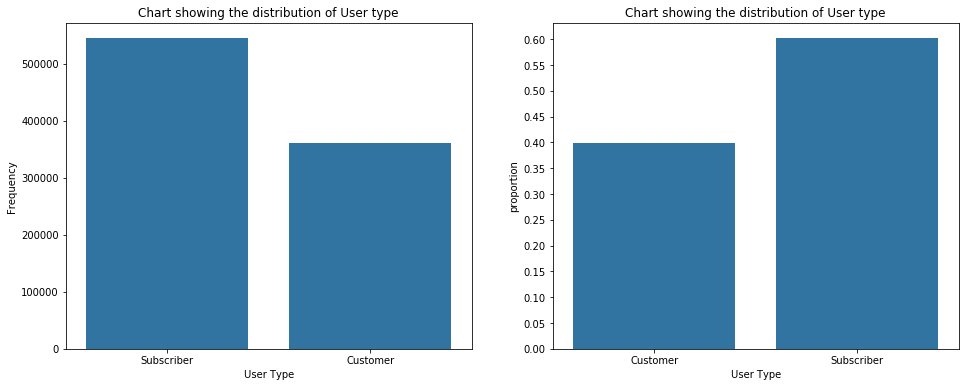

In [13]:
# Univariate exploration of User type feature using bar chart
plt.figure(figsize = (16, 6))
plt.subplot(1,2,1)
base_color = sns.color_palette()[0]
user_type_order = df_merged['user_type'].value_counts().index
sns.countplot(data = df_merged, x = 'user_type', color = base_color, order = user_type_order)
plt.xlabel('User Type')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.title('Chart showing the distribution of User type')

# get proportion taken by most common group for derivation
# of tick marks
n_points = df_merged.shape[0]
max_count = df_merged['user_type'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot 
plt.subplot(1,2,2)
base_color = sns.color_palette()[0]
sns.countplot(data =df_merged , x = 'user_type', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')
plt.xlabel('User Type')
plt.xticks(rotation = 0)
plt.title('Chart showing the distribution of User type');

## Distribution of Rental access method
> The bar chart below show the ditribution of the rental access method feature in term of frequency and proportion. From the chart below, we can observe that we have we have more rental access method of category app than rental access method of category clipper. In terms of proportion, we have approximately ninty percent of the rental access method of category app while ten percent are of category clipper.

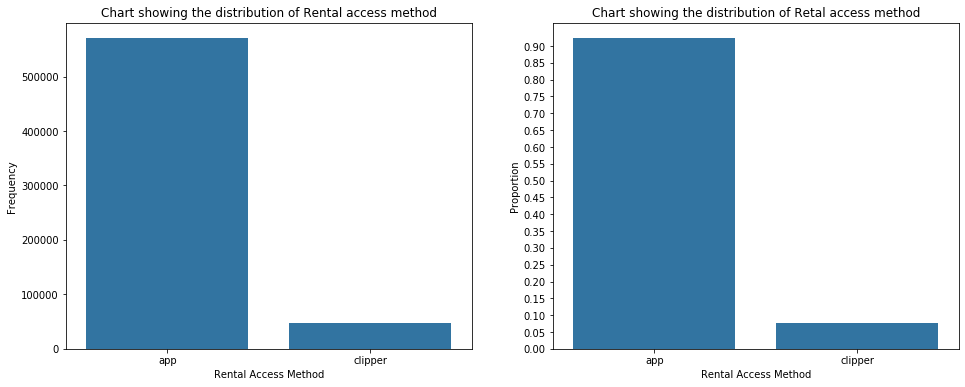

In [14]:
# Univariate exploration of the rental_access_method feature using bar chart
plt.figure(figsize = (16, 6))
plt.subplot(1,2,1)
base_color = sns.color_palette()[0]
user_type_order = df_merged['rental_access_method'].value_counts().index
sns.countplot(data = df_merged, x = 'rental_access_method', color = base_color, order = user_type_order)
plt.xlabel('Rental Access Method')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.title('Chart showing the distribution of Rental access method')

# get proportion taken by most common group for derivation
# of tick marks
n_points = df_merged['rental_access_method'].value_counts().sum()
max_count = df_merged['rental_access_method'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot 
plt.subplot(1,2,2)
base_color = sns.color_palette()[0]
sns.countplot(data =df_merged , x = 'rental_access_method', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('Proportion')
plt.xlabel('Rental Access Method')
plt.xticks(rotation = 0)
plt.title('Chart showing the distribution of Retal access method');

## Distribution of Start day and End day by User type
> The chart below shows the ditribution of start day and end day by user type. From the chart below, we could draw insights that user type of category customer has majority of the riders for both start day and end day. From the chart below, majority of the riders of user type customer start day and end day where on wednesday, thursday and friday while the least start day and end day where on saturday and sunday. Same holds true for user type subcribers. This concludes that there is a relationship between start day, End day and user type.

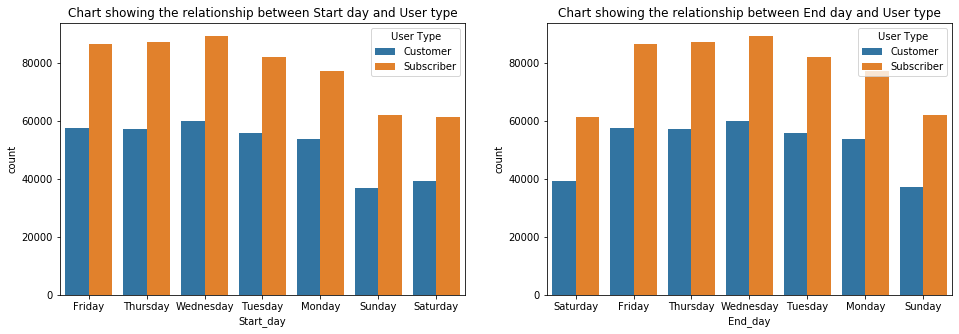

In [15]:
# Bivaraite distribution of start day verse user type
plt.figure(figsize =(16, 5))

plt.subplot(1, 2, 1)
sns.countplot(data = df_merged, x = 'Start_day', hue = 'user_type')
plt.legend(title = 'User Type')
plt.title('Chart showing the relationship between Start day and User type');

# Bivaraite distribution of end day verse user type
plt.subplot(1, 2,2)
sns.countplot(data = df_merged, x = 'End_day', hue = 'user_type')
plt.legend(title = 'User Type')
plt.title('Chart showing the relationship between End day and User type');


## Distribution of Start day and End day by Rental access method
> The chart below shows the ditribution of start day and end day by rental access method. From the chart below, we could see that the rental access method of category **app** has majority of the riders for both start day and end day. From the chart above, majority of the riders of rental access method app start day and end day where on wednesday, thursday and friday while the least start day and end day where on saturday and sunday. Same holds true for rental access method clipper. This concludes that there is a relationship between start day, End day and rental access method.


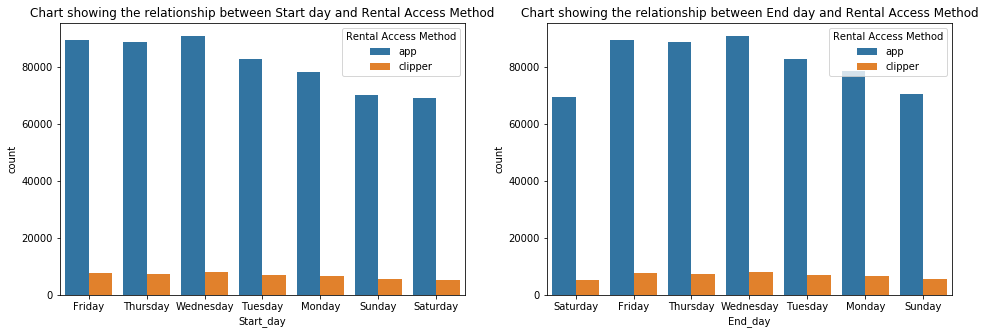

In [16]:
# Bivaraite distribution of start day verse rental access method
plt.figure(figsize =(16, 5))

plt.subplot(1, 2, 1)
sns.countplot(data = df_merged, x = 'Start_day', hue = 'rental_access_method')
plt.legend(title = 'Rental Access Method')
plt.title('Chart showing the relationship between Start day and Rental Access Method');

# Bivaraite distribution of end day verse rental access method
plt.subplot(1, 2,2)
sns.countplot(data = df_merged, x = 'End_day', hue = 'rental_access_method')
plt.legend(title = 'Rental Access Method')
plt.title('Chart showing the relationship between End day and Rental Access Method');

## Distribution of Start Month and End month by User type
> The chart below shows the ditribution of start month and end month by user type. From the chart below, we could draw insights that the user type category subcriber has majority of the riders for both start month and end month. From the chart below, majority of the riders of user type category subscriber start month and end month was in february while the least start month and end month was in april. Same holds true for user type category customer. This also suggest that there is a realtionship between these features.

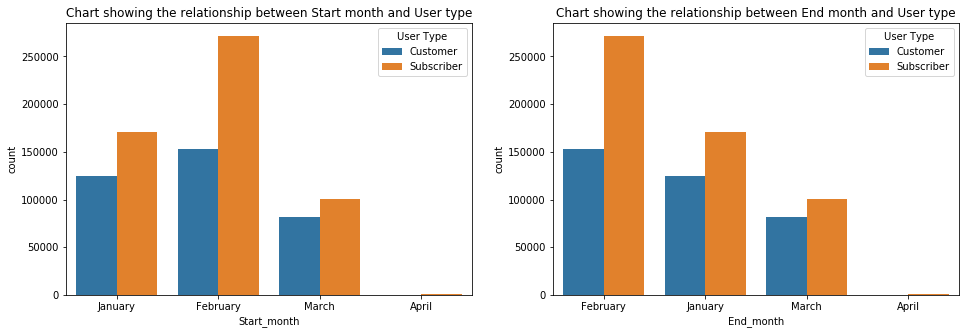

In [17]:
plt.figure(figsize =(16, 5))

# Bivaraite distribution of start month verse user type
plt.subplot(1, 2, 1)
sns.countplot(data = df_merged, x = 'Start_month', hue = 'user_type')
plt.legend(title = 'User Type')
plt.title('Chart showing the relationship between Start month and User type');

# Bivaraite distribution of end month verse user type
plt.subplot(1, 2,2)
sns.countplot(data = df_merged, x = 'End_month', hue = 'user_type')
plt.legend(title = 'User Type')
plt.title('Chart showing the relationship between End month and User type');

## Distribution of Start Month and End month by Rental access method
> The chart below shows the ditribution of start month and end month by rental access method. From the chart beloe, we could see that the rental access method of category app has majority of the riders for both start month and end month. From the chart below, majority of the riders of the rental access method category app start month and end month was in february while the least start month and end month was in april. Same holds true for rental access method category clipper.

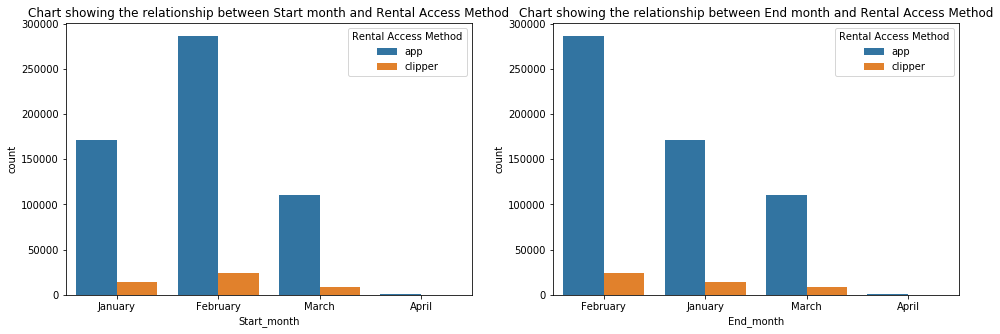

In [18]:
plt.figure(figsize =(16, 5))

# Bivaraite distribution of start month verse rental access method
plt.subplot(1, 2, 1)
sns.countplot(data = df_merged, x = 'Start_month', hue = 'rental_access_method')
plt.legend(title = 'Rental Access Method')
plt.title('Chart showing the relationship between Start month and Rental Access Method');

# Bivaraite distribution of end month verse rental access method
plt.subplot(1, 2,2)
sns.countplot(data = df_merged, x = 'End_month', hue = 'rental_access_method')
plt.legend(title = 'Rental Access Method')
plt.title('Chart showing the relationship between End month and Rental Access Method');

In [22]:
# Log transformation of the duratio in second feature
df_merged['duration_sec'] = np.log10(df_merged['duration_sec'])

## Distribution of Duration in seconds by User type
> The chart below is a box plot and violin plot showing the distribution of user type by duration in seconds. The chart shows that both category of the user type ( Customer and Subscribers) has same median, and quartiles and there is a presence of outliers.

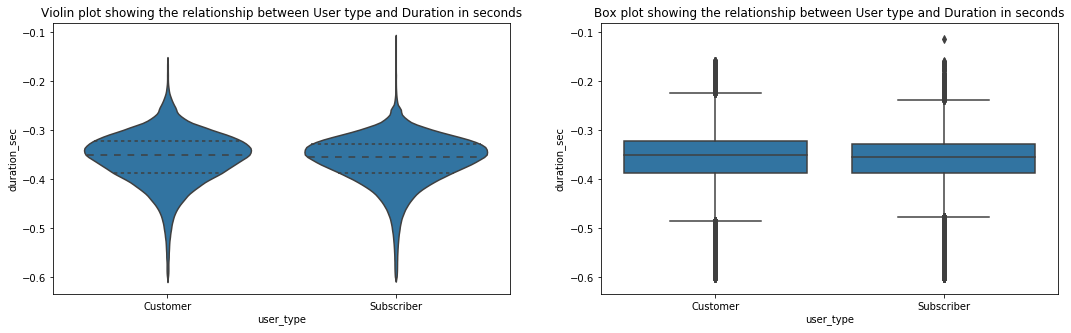

In [23]:
# Log transformation of the duratio in second feature
df_merged['duration_sec'] = np.log10(df_merged['duration_sec'])

# box plot and violin plot of the duration in seconds by user type
plt.figure(figsize = [18, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = df_merged, x = 'user_type', y = 'duration_sec', color = base_color, inner = 'quartile')
plt.title('Violin plot showing the relationship between User type and Duration in seconds')


# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df_merged, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim(ax1.get_ylim())
plt.title('Box plot showing the relationship between User type and Duration in seconds'); # set y-axis limits to be same as left plot

## Distribution of Duration in seconds by Rental access method
> The chart below is a box plot and violin plot showing the distribution of rentall access method by duration in seconds. The chart shows that both category of the rental access method ( app and clipper) do not have same median, and quartiles but there is a presence of outliers as seen in the chart below.

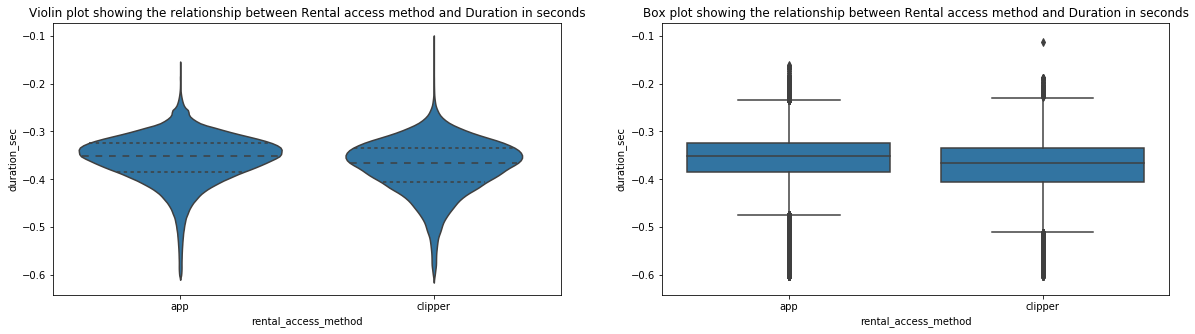

In [25]:
# box plot and violin plot of the duration in seconds by rental_access_method
plt.figure(figsize = [20, 5])
base_color = sns.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = df_merged, x = 'rental_access_method', y = 'duration_sec', color = base_color, inner = 'quartile')
plt.title('Violin plot showing the relationship between Rental access method and Duration in seconds')

# right plot: box plot
plt.subplot(1, 2, 2)
sns.boxplot(data = df_merged, x = 'rental_access_method', y = 'duration_sec', color = base_color)
plt.ylim(ax1.get_ylim())
plt.title('Box plot showing the relationship between Rental access method and Duration in seconds'); # set y-axis limits to be same as left plot

## Multivariate visualization between Start day, Duration in Seconds and User type features
> The chart below shows a box distribution of start day with duration in seconds hue by user type. From the chart below, under the user type category **Customer** sunday and saturday has a higher median and quartiles. For the category **Subscriber** all the days has almost the same median and quartiles except for saturday and sunday with a slight difference. The chart also shows the presence of outliers in the duration in seconds features.

<Figure size 1080x360 with 0 Axes>

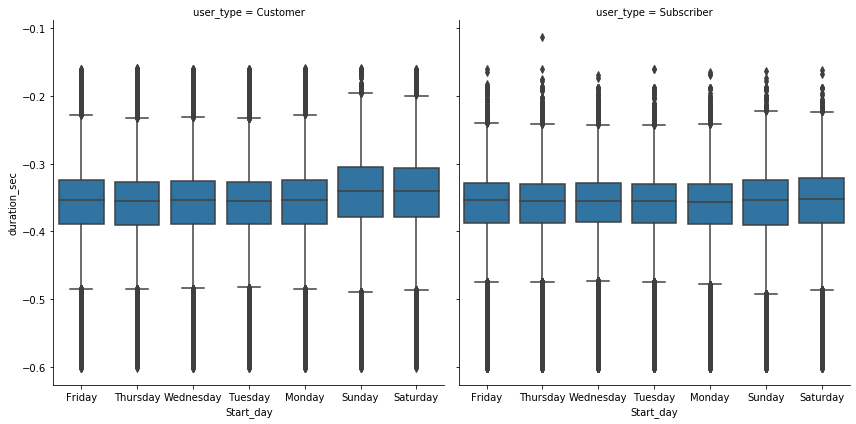

In [42]:
# Multivariate box plot of start day and duration in second hued by user type
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.figure(figsize = [15, 5])
g = sns.FacetGrid(data = df_merged, col = 'user_type', size = 6,  margin_titles = True)
g = (g.map(sns.boxplot, 'Start_day', 'duration_sec'),g.set_titles("{Start_day} Monday"));

## Multivariate visualization between End day, Duration in Seconds and User type features
> The chart below shows a box distribution of end day with duration in seconds hue by user type. From the chart below, under the user type category **Customer** sunday and saturday has a higher median and quartiles. For the category **Subscriber** all the days has almost the same median and quartiles except for saturday and sunday with a slight difference. The chart also shows the presence of outliers in the duration in seconds features.

<Figure size 1080x360 with 0 Axes>

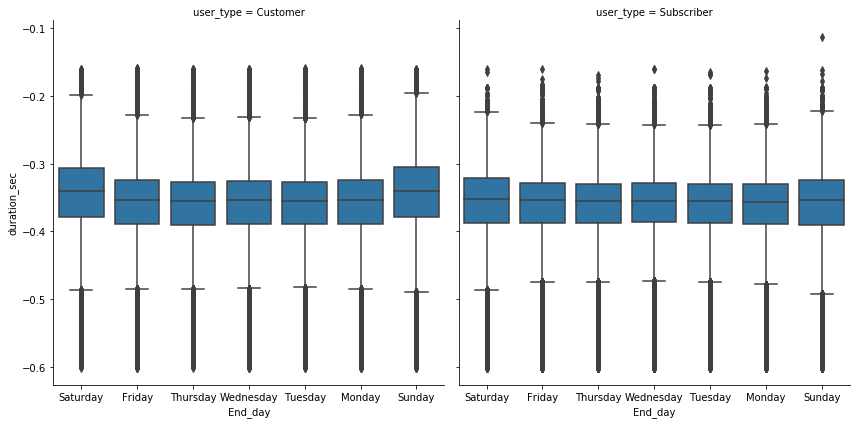

In [43]:
# Multivariate box plot of end day and duration in second hued by user type
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.figure(figsize = [15, 5])
g = sns.FacetGrid(data = df_merged, col = 'user_type', size = 6,  margin_titles = True)
g.map(sns.boxplot, 'End_day', 'duration_sec');

## Multivariate visualization between Start month, Duration in Seconds and User type features
> The chart below shows a box distribution of start month with duration in seconds hue by user type. From the chart below, under the user type category **Customer** the month of april has a higher median and quartiles. For the category **Subscriber** all the months has almost the same median and quartiles except for april with a slight difference. The chart also shows the presence of outliers in the duration in seconds features. The chart also shows that the mean duration in seconds for user type category customer is greater that that of user type category subscriber.

<Figure size 1080x360 with 0 Axes>

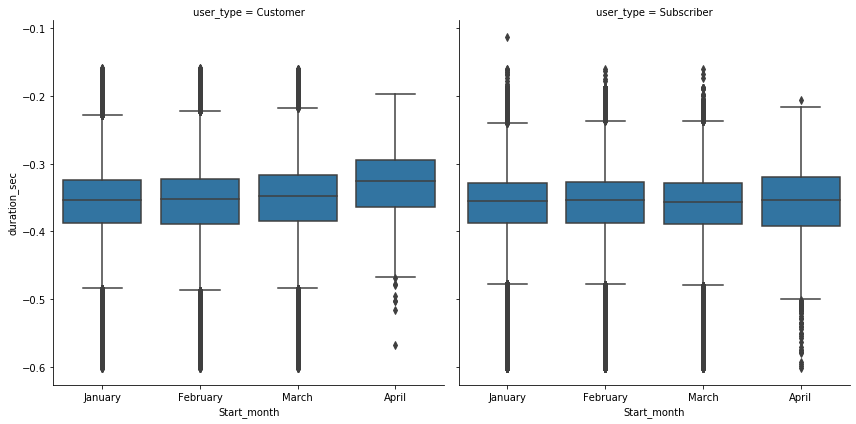

In [44]:
# Multivariate box plot of start month and duration in second hued by user type
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.figure(figsize = [15, 5])
g = sns.FacetGrid(data = df_merged, col = 'user_type', size = 6,  margin_titles = True)
g.map(sns.boxplot, 'Start_month', 'duration_sec');

## Multivariate visualization between End month, Duration in Seconds and User type features
> The chart below shows a box distribution of end month with duration in seconds hue by user type. From the chart below, under the user type category **Customer** the month of april has a higher median and quartiles. For the category **Subscriber** all the months has almost the same median and quartiles except for april with a slight difference. The chart also shows the presence of outliers in the duration in seconds features. The chart also shows that the mean duration in seconds for user type category customer is greater that that of user type category subscriber.

<Figure size 1080x360 with 0 Axes>

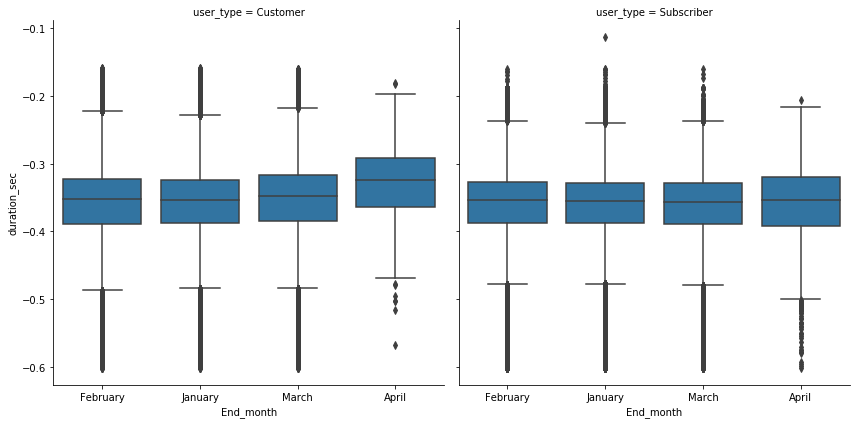

In [45]:
# Multivariate box plot of end month and duration in second hued by user_type
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
plt.figure(figsize = [15, 5])
g = sns.FacetGrid(data = df_merged, col = 'user_type', size = 6,  margin_titles = True)
g.map(sns.boxplot, 'End_month', 'duration_sec');

## Multivariate visualization between Start month, Duration in Seconds and rental access method features
> The chart below shows a box distribution of start month with duration in seconds hue by rental access method. From the chart below, under the rental access method category **app** the month of april has a higher median and quartiles. For the category **clipper** all the months has almost the same median and quartiles except for april with a slight difference lower than the rest of the month. the chart also shows that the app rental access methoad category has a higher duration second that the clipper category

Text(0.5, 1.0, 'Chart the relationship between Start month and Duration in second hued by Rental access method')

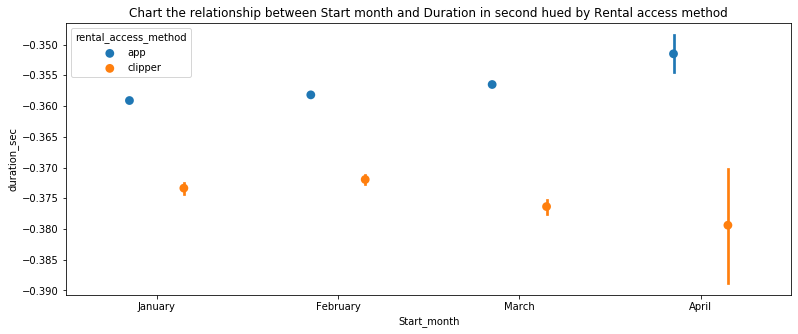

In [52]:
plt.figure(figsize= [13, 5])
ax = sns.pointplot(data = df_merged, x = 'Start_month', y = 'duration_sec', hue = 'rental_access_method',
                  dodge = 0.3, linestyles = "")
plt.title('Chart the relationship between Start month and Duration in second hued by Rental access method')

In [50]:
df_merged_new = df_merged[(df_merged.start_station_latitude >= 37.2) & (df_merged.start_station_latitude <= 38)]
df_merged_new = df_merged_new[(df_merged_new.end_station_latitude >= 37.2) & (df_merged_new.end_station_latitude <= 38)]

## Multivariate visualization between Start station latitude, End station latitude and  Duration in Seconds
> The chart above show the distribution of the start station latitude and end station latitude by duration in seconds. From the scatter plot above, we can See that data points where separated in two category. Also, from the chart above, majority of the data point has duration in seconds less tham 4.5seconds. there where few outliers detected.

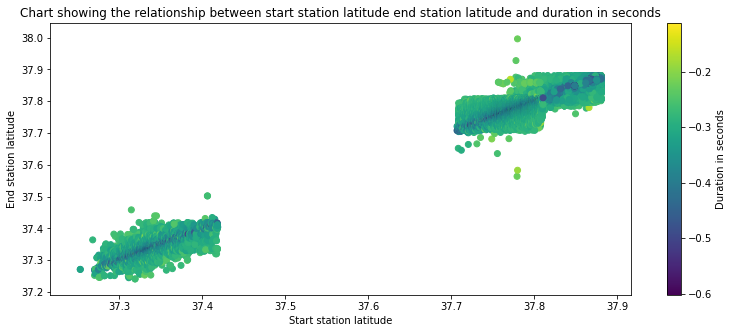

In [51]:
plt.figure(figsize= [13, 5])
plt.scatter(data = df_merged_new, x = 'start_station_latitude', y = 'end_station_latitude', c = 'duration_sec',
            cmap = 'viridis')
plt.colorbar(label = 'Duration in seconds');
plt.xlabel('Start station latitude')
plt.ylabel('End station latitude')
plt.title('Chart showing the relationship between start station latitude end station latitude and duration in seconds');

#                                     THANK YOU